<a href="https://colab.research.google.com/github/integer-class/machine-learning/blob/main/AL_AZHAR_RRF/jobsheet_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏡 Lab Work 1
K-Means Clustering

## Intro
K-Means is a method of unsupervised learning in machine learning. This method determines the number of clusters based on the chosen number. The manual process of K-Means can be seen in the following link,

Manually calculated K-Means

In this module's hands-on exercise, we will directly practice creating a K-Means model using Python. For the first module, we will use a simple case study, which involves the use of the iris dataset. In the second module, we will perform more advanced clustering, specifically color reduction with image data.

### Step 1 - Preparation

In [1]:
# Import Necessary Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load Data
df = pd.read_csv('Iris.csv')

# Peek Data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Step 2 - Select Features and Label

In [2]:
# Select Features
X = df.iloc[:, 1:-1] # slice features vector
y = df.iloc[:, -1] # slice data labels

### Step 3 - Visualize The Data

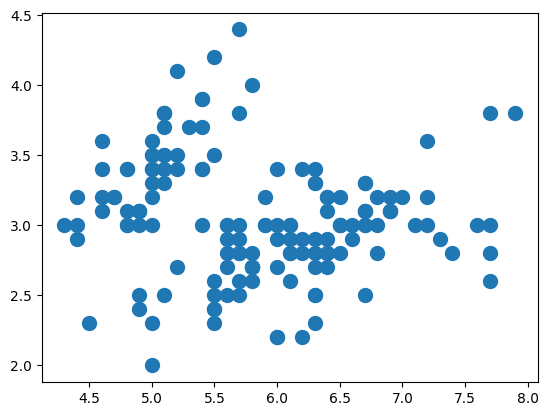

In [3]:
# Plot Data
# We have 4 dimensional feature space
# Thereofe, we only plot the cluster based on Sepal Length and Sepal Width only

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

### Step 4 - Make K-Means Model

In [4]:
# Create K-Means Model
# In this model, we only just create a model with k = 2 even we already know the total of Iris dataset label is 3.

from sklearn.cluster import KMeans

# Instantiation K-Means Model
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

### Step 5 - Check Cluster
This code shows you how to check the cluster created by K-Means model that we create before.

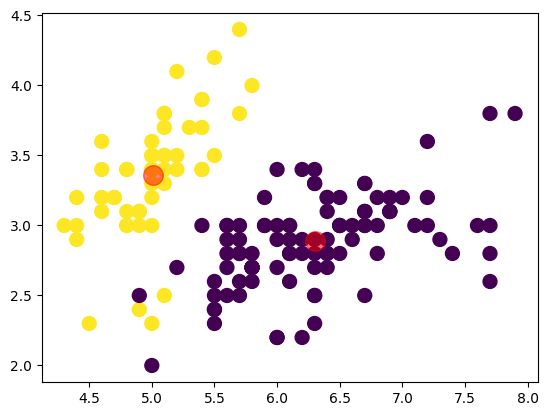

In [5]:
# Plot cluster based on Sepal Length and Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Step 6 - Evaluate Model
In this work, we will evaluate our K-Means model using "Sum of Sequare Error" (SSE).

In [6]:
# Check the value of SSE
print(f'SSE: {cl_kmeans.inertia_}')

SSE: 152.36870647733915


### Step 7 - Find The Optimum K
In this code, we try to implement elbow method to find the optimum value of
k
k in our dataset.

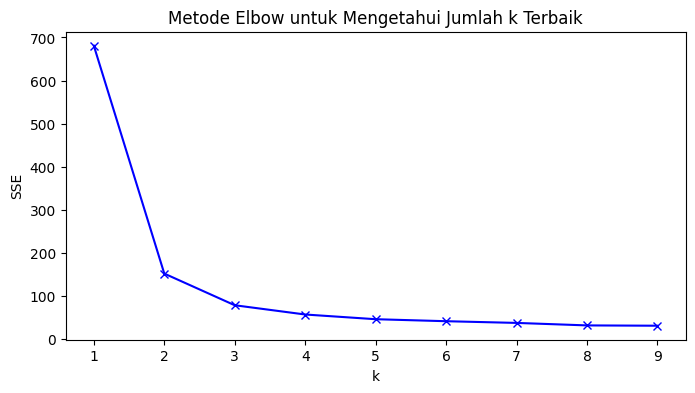

In [7]:
# Implementasi Metode Elbow

# The of SSE's values
sse = []

# Limit finding the best k from 1-10
K = range(1,10)

# Calculate SSE for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

Check SSE value for each k

In [8]:
# Check SSE value for each k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=46.55405384615384
k=6; SSE=41.929700724637684
k=7; SSE=37.971817748917765
k=8; SSE=32.185490259740256
k=9; SSE=31.46075684380033


# 🏚️ Lab Work 2
Clustering on Unstructured Data

## Case 1: Numerical Images
In this work, you will try to cluster numerical images based on their characteristic. However, even this work using K-Means as the model, the entire process will be evaluated using classification metric named accuracy.

### Step 1 - Load Data
This code try to download the digits data. It may takes several minutes to complete.

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

### Step 2 - Make K-Means Model
We will create 10 cluster based on number of digits (1-10). Therefore, in the n_clusters  we set is as 10.

In [10]:
# Create K-Means model
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

### Step 3 - Plot Digits Cluster

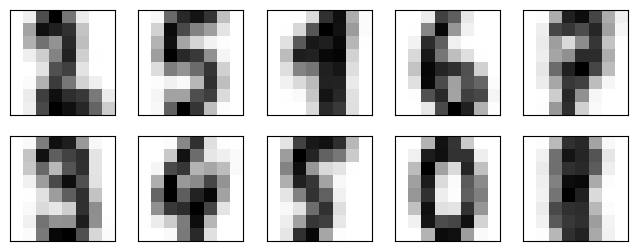

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Step 4 - Labeling Based on The Cluster
In this code, we will create a label for each cluster. Please take a notes, in this code, we still rely on digits labels that we get from dataset.

In [12]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

### Step 5 - Evaluate Based Using Accuract Metric

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

Check the confusion matrix result,

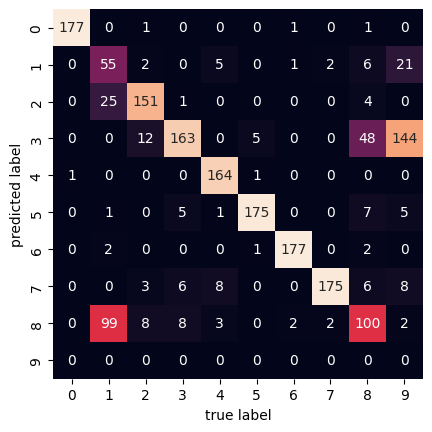

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Case 2: Image Compression
Clustering also can be use in image compression scenario. In this case, we will replace surrounding pixel value using similar value based on their cluster.

### Step 1 - Load Data

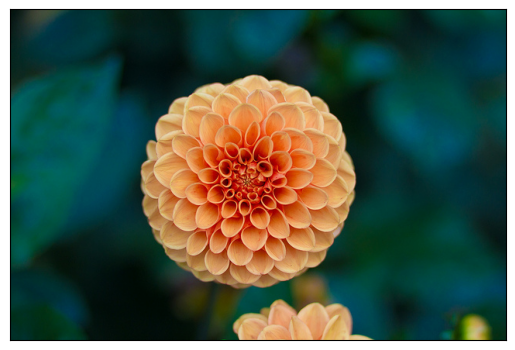

In [18]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

Check the image shape,

In [19]:
flower.shape

# Result,
# (427, 640, 3)

(427, 640, 3)

### Step 2 - Normalize The Pixel Value
In this code, we will make the value of pixel to 0-1 by divided with 255.

In [20]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

### Step 3 - Plot The Pixel Distribution
Plot the pixel value distribution based on 3 channel, red, green, and blue.

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

Call the function,

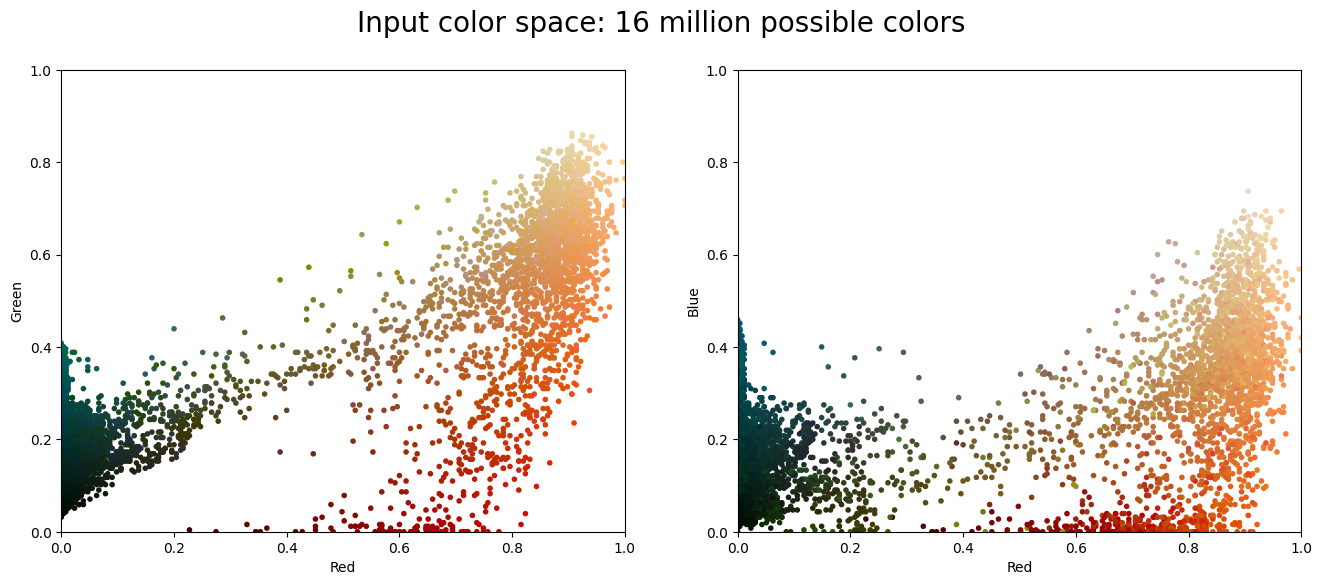

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

### Step 4 - Make K-Means Model
In this case, we will use special type of K-Means named MiniBatchKmeans. Mini batch mean, we will create a cluster based on several mini batch of data. Moreover, this process also compress the image to 16 color only, thus, the number of cluster is 16.

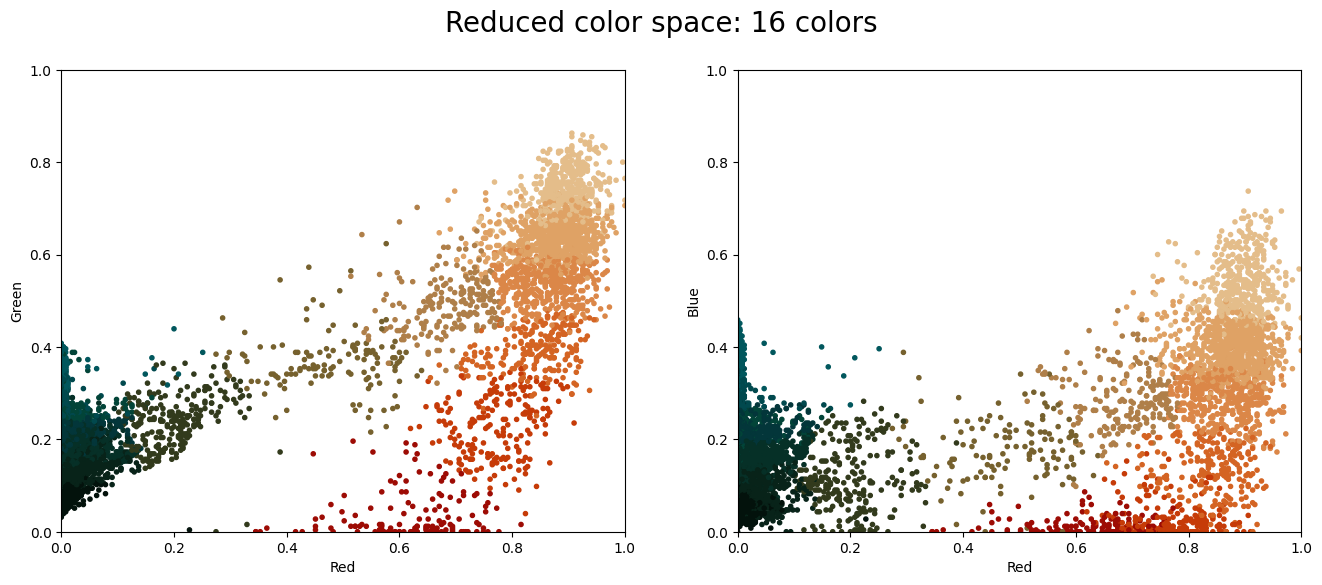

In [23]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

### Step 5 - Visualize The Result

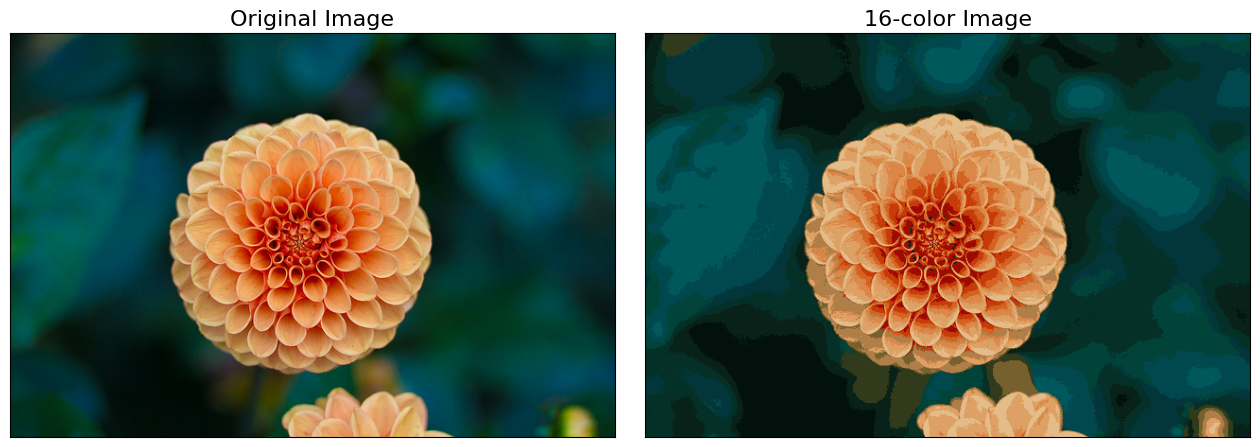

In [24]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

# 🏛️ Lab Work 3
Self-Organizing Map (SOM)

## Intro
An example of applying Self-Organizing Map (SOM) for clustering using the SOMPY library. Before you begin, make sure you have installed the SOMPY library. If SOMPY is not found in the library, you can use MiniSom. In this lab, we will use the MiniSom library for implementing SOM with a smaller size.

### Step 0 - Install Minisom

In [25]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=f6768b39bf496459afb7b7b68cf980fb537e9fcc199b6ba11d0668b7263d46bb
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


### Step 1 - Import Library

In [26]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Step 2 - Load Iris Dataset

In [27]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

### Step 3 - Normalize Data

In [28]:
# Normalize Data
data = data / data.max(axis=0)

### Step 4 - Make SOM Model
We are going to use 10x10 architecture.

In [29]:
# Initiate SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

#### Step 4.1 - Initiatie Random Weight for SOM

In [30]:
# Initiate random weight
som.random_weights_init(data)

#### Step 4.2 - Fit Model

In [31]:
# Fit SOM
num_epochs = 100
som.train_random(data, num_epochs)

### Step 5 - Visualize SOM Network
Using the trained map for visualization. In this work, we will display the map with colors and mark the winners for each sample.

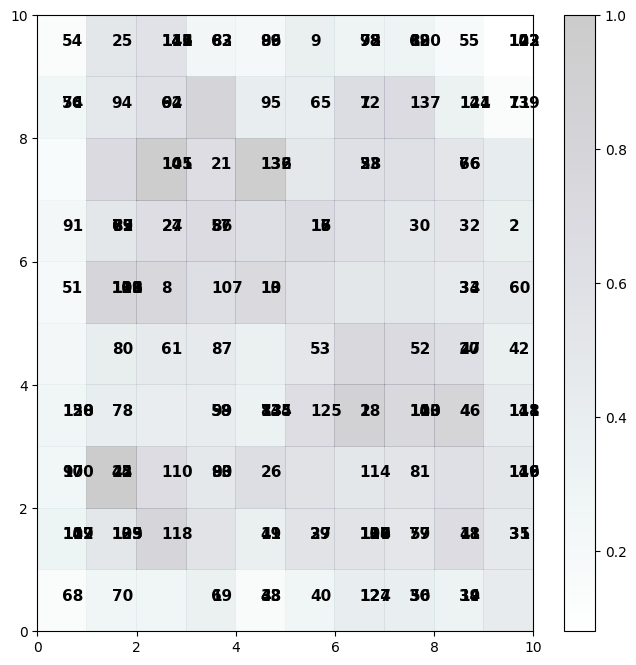

In [32]:
# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

# 🏢 Lab Assigment